In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [54]:
# 读取数据
df = pd.read_excel('data2.xlsx')
# 舍弃一些nan值
df = df.dropna()

# 获取时间数据中的时间数据，后面画图会用到，并将字符串格式转换为datetime格式
date = np.array(pd.to_datetime(df['指标名称']))
# 将数据的行名设置为时间
df = df.set_index('指标名称')
data = df.copy()

In [55]:
data.head(5)

,1m,3m,6m,1y,2y,3y,4y,5y,6y,7y,8y,9y,10y,15y,20y,30y,50y
指标名称,,,,,,,,,,,,,,,,,
2016-01-04,2.27,2.30,2.32,2.35,2.46,2.57,2.66,2.75,2.84,2.87,2.87,2.87,2.87,3.17,3.49,3.62,3.75
2016-01-05,2.28,2.30,2.31,2.37,2.49,2.62,2.71,2.79,2.87,2.90,2.90,2.89,2.89,3.19,3.51,3.64,3.77
2016-01-06,2.33,2.33,2.33,2.37,2.50,2.63,2.70,2.76,2.85,2.88,2.88,2.88,2.89,3.17,3.48,3.62,3.74
2016-01-07,2.29,2.35,2.34,2.37,2.49,2.61,2.69,2.75,2.83,2.86,2.86,2.85,2.85,3.14,3.44,3.57,3.70
2016-01-08,2.30,2.32,2.31,2.36,2.48,2.59,2.67,2.73,2.81,2.84,2.84,2.84,2.84,3.12,3.42,3.55,3.68


In [56]:
data.tail()

,1m,3m,6m,1y,2y,3y,4y,5y,6y,7y,8y,9y,10y,15y,20y,30y,50y
指标名称,,,,,,,,,,,,,,,,,
2020-06-28,1.73,1.87,2.12,2.13,2.28,2.43,2.51,2.57,2.75,2.85,2.85,2.84,2.84,3.31,3.43,3.57,3.78
2020-06-29,1.58,1.75,2.09,2.11,2.29,2.40,2.49,2.59,2.76,2.85,2.85,2.85,2.85,3.32,3.44,3.59,3.77
2020-06-30,1.63,1.74,2.07,2.18,2.24,2.39,2.47,2.55,2.72,2.82,2.82,2.82,2.82,3.29,3.41,3.56,3.74
2020-07-01,1.71,1.71,2.06,2.13,2.29,2.40,2.50,2.60,2.74,2.83,2.84,2.84,2.85,3.31,3.43,3.58,3.74
2020-07-02,1.59,1.73,2.06,2.10,2.27,2.39,2.48,2.58,2.72,2.82,2.85,2.85,2.86,3.32,3.44,3.58,3.73


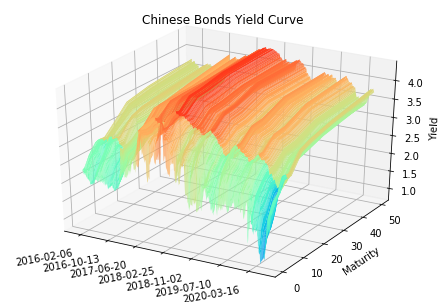

In [57]:
# 作利率期限结构的三维图
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.dates as dates
import matplotlib.ticker as ticker
fig = plt.figure()
ax = Axes3D(fig)
#x轴数据： 将datetime格式转换为数值格式（int），
x_data = dates.date2num(date)
#y轴数据： 国债的到期时间
y_data = np.array([0.083, 0.25, 0.6,1,2,3,4,5,6,7,8,9,10,15,20,30,50])
# 将 x轴数据和y轴数据合并成网格数据
X1,Y1=np.meshgrid(x_data,y_data)
# z轴数据：债券的收益率
Z1= data.values.transpose()

# 作图
ax.plot_surface(X1, Y1, Z1, rstride=10, cstride=1, cmap=plt.get_cmap('rainbow'), vmin=np.nanmin(Z1), vmax=np.nanmax(Z1))
ax.set_title('Chinese Bonds Yield Curve')
ax.set_ylabel('Maturity')
ax.set_zlabel('Yield')

#将数据格式的数据回调成字符串格式的数据
def format_date(x, pos=None):
    return dates.num2date(x).strftime('%Y-%m-%d')

ax.w_xaxis.set_major_formatter(ticker.FuncFormatter(format_date))
for t1 in ax.w_xaxis.get_ticklabels():
    t1.set_ha('right')
    t1.set_rotation(10)

plt.show()



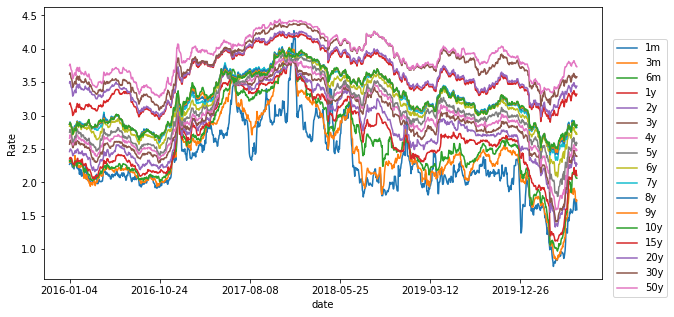

In [58]:
#作利率期限结构的二维图
data.plot(figsize=(10, 5))
plt.xlabel('date')
plt.ylabel('Rate')
plt.legend(bbox_to_anchor=(1.01,0.9), loc=2)
plt.show()



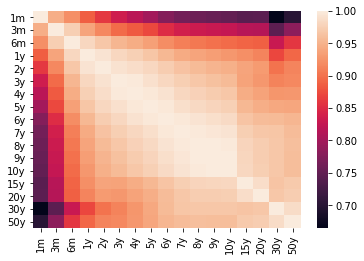

In [59]:
# 作利率期限结构的相关关系图
import seaborn as sns
sns.heatmap(data.corr())
plt.show()

In [60]:
# 定义PCA函数
def PCA(df):
    '''
    ==============================
    params:
            df:data
    returns:
            scores:
            eigenvals: 特征值
            eigenvecs: 特征向量
    =============================
    ''' 
    df -= df.mean(axis=0)
    R = np.cov(df, rowvar=False)
    eigenvals, eigenvecs = np.linalg.eigh(R)
    eigenvecs = eigenvecs[:, np.argsort(eigenvals)[::-1]]
    eigenvals = eigenvals[np.argsort(eigenvals)[::-1]]
    #eigenvecs = eigenvecs[:, :num_reconstruct]
    scores = np.dot(eigenvecs.T, df.T).T
    return scores, eigenvals, eigenvecs

In [61]:
scores, evals, evecs = PCA(data)

In [62]:
# 将array数据保存在dataframe里面
df_eigval = pd.DataFrame({"Eigenvalues":evals}, index=range(1,18))
df_eigval

,Eigenvalues
1,3.181089
2,0.181918
3,0.027168
4,0.016398
5,0.009801
6,0.006170
7,0.002990
8,0.002078
9,0.001454
10,0.001364


In [63]:
# 计算解释程度，并以百分数显示出来
df_eigval["Explained proportion"] = df_eigval["Eigenvalues"] / np.sum(df_eigval["Eigenvalues"])
df_eigval['Explained proportion2'] = df_eigval['Explained proportion'].map(lambda x:format(x,".2%"))
df_eigval

,Eigenvalues,Explained proportion,Explained proportion2
1,3.181089,0.926685,92.67%
2,0.181918,0.052995,5.30%
3,0.027168,0.007914,0.79%
4,0.016398,0.004777,0.48%
5,0.009801,0.002855,0.29%
6,0.006170,0.001797,0.18%
7,0.002990,0.000871,0.09%
8,0.002078,0.000605,0.06%
9,0.001454,0.000424,0.04%
10,0.001364,0.000397,0.04%


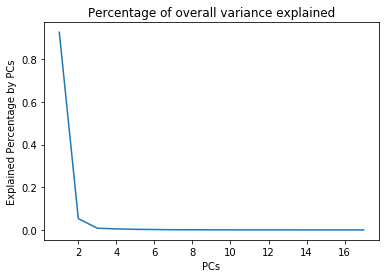

In [64]:
# 作解释力度折线图
df_eigval['Explained proportion'].plot()
plt.title('Percentage of overall variance explained')
plt.xlabel('PCs')
plt.ylabel('Explained Percentage by PCs')
plt.show()

In [65]:
a = ['1m', '3m', '6m', '1y', '2y', '3y', '4y', '5y', '6y', '7y','8y', '9y', '10y', '15y', '20y', '30y', '50y']
evecs = pd.DataFrame(evecs, index=a)
evecs.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
1m,0.265030,-0.574334,0.363121,0.677704,0.045327,0.045147,0.035322,0.001167,-0.029830,0.047145,-0.011825,0.012503,-0.000059,0.000628,-0.001999,-0.001919,-0.001121
3m,0.302319,-0.462727,0.129543,-0.534226,-0.428406,0.157825,-0.389365,-0.119419,0.061373,-0.075382,-0.027530,0.030467,0.082673,0.004371,0.002037,0.001803,0.002409
6m,0.318608,-0.264455,-0.033540,-0.375811,0.149307,-0.115455,0.756415,0.116739,-0.007875,0.106406,0.195958,-0.062910,-0.104138,-0.012525,0.002785,0.005222,-0.000988
1y,0.309764,-0.106802,-0.272398,-0.075379,0.438840,-0.194502,-0.229794,0.431893,-0.120647,-0.113452,-0.496389,-0.085260,0.248682,0.001356,-0.004101,-0.005538,-0.004279
2y,0.285555,-0.009361,-0.276865,0.045647,0.318252,-0.016541,-0.388821,-0.030754,-0.082863,-0.091537,0.667453,-0.121296,-0.319887,0.009059,0.087959,-0.018488,-0.002773


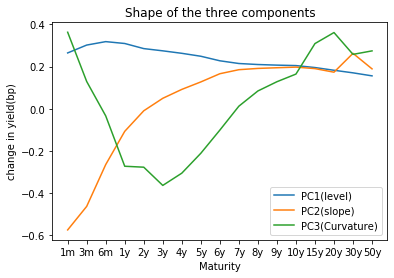

In [66]:
loadings = evecs.iloc[:,:3]
plt.plot(a,loadings)
plt.xlabel("Maturity")
plt.ylabel("change in yield(bp)")
plt.title('Shape of the three components')
plt.legend(['PC1(level)','PC2(slope)','PC3(Curvature)'])
plt.show()



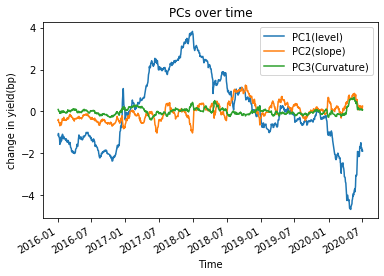

In [67]:
scores = data.values.dot(evecs.iloc[:,:3])
plt.plot(date, scores[:,0:3])
plt.gcf().autofmt_xdate() 
plt.xlabel("Time")
plt.ylabel("change in yield(bp)")
plt.title('PCs over time')
plt.legend(['PC1(level)','PC2(slope)','PC3(Curvature)'])
plt.show()


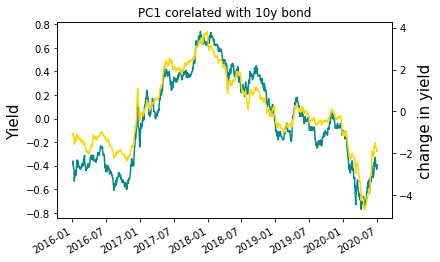

In [68]:
fig = plt.figure()   
ax1 = fig.add_subplot(111)    
l1 = ax1.plot(date, data['10y'].values, 'darkcyan', label='10y')    
ax1.set_ylabel('Yield', fontsize=15)
ax1.set_title("PC1 corelated with 10y bond")
 
ax2 = ax1.twinx()  # this is the important function
l3 = ax2.plot(date, scores[:,0], 'gold', label='PC1')
ax2.set_ylabel('change in yield', fontsize=15)
plt.gcf().autofmt_xdate() 
plt.show()


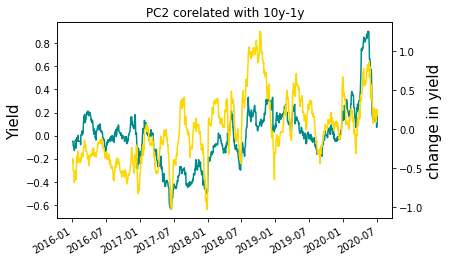

In [69]:
fig = plt.figure()   
ax1 = fig.add_subplot(111) 
delta = data['10y'] - data['1y']   
l1 = ax1.plot(date, delta.values, 'darkcyan', label='10y')    
ax1.set_ylabel('Yield', fontsize=15)
ax1.set_title("PC2 corelated with 10y-1y")
 
ax2 = ax1.twinx()  # this is the important function
l3 = ax2.plot(date, scores[:,1], 'gold', label='PC1')
ax2.set_ylabel('change in yield', fontsize=15)
plt.gcf().autofmt_xdate() 
plt.show()

In [70]:
reconstruct =  pd.DataFrame(scores.dot(loadings.transpose()), index=data.index, columns=data.columns)
residuals = data - reconstruct
residuals.head()

,1m,3m,6m,1y,2y,3y,4y,5y,6y,7y,8y,9y,10y,15y,20y,30y,50y
指标名称,,,,,,,,,,,,,,,,,
2016-01-04,0.006964,-0.008455,0.002538,0.002840,-0.003767,0.023436,0.033870,0.040926,0.001058,-0.047946,-0.064914,-0.068183,-0.075781,-0.130291,0.106862,0.109625,0.097040
2016-01-05,0.027320,-0.011929,-0.025361,-0.006884,-0.005932,0.037577,0.048382,0.047122,-0.000182,-0.046415,-0.061643,-0.073840,-0.080591,-0.130743,0.109554,0.106981,0.099560
2016-01-06,0.033384,-0.017769,-0.025400,-0.015341,0.003658,0.051481,0.046200,0.028524,-0.004854,-0.048741,-0.062970,-0.064598,-0.060849,-0.130628,0.098501,0.112666,0.088987
2016-01-07,0.003275,0.007460,-0.008089,-0.013920,-0.001993,0.033287,0.042496,0.030810,-0.006087,-0.043669,-0.053961,-0.063217,-0.067472,-0.120290,0.099963,0.102036,0.084582
2016-01-08,0.021604,-0.010213,-0.021321,-0.005464,0.006659,0.032082,0.041475,0.029804,-0.007486,-0.045235,-0.055520,-0.054777,-0.059008,-0.122155,0.097040,0.099672,0.079864


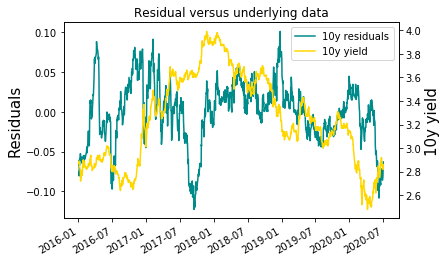

In [75]:
fig = plt.figure()   
ax1 = fig.add_subplot(111) 
l1 = ax1.plot(date, residuals['10y'].values, 'darkcyan', label='10y residuals') 
ax1.set_ylabel('Residuals', fontsize=15)
ax1.set_title("Residual versus underlying data") 
  
ax2 = ax1.twinx()  # this is the important function
l3 = ax2.plot(date, df['10y'].values, 'gold', label='10y yield')
ax2.set_ylabel('10y yield', fontsize=15)
lns = l1 + l3
labs =[l.get_label() for l in lns]
ax1.legend(lns, labs)
plt.gcf().autofmt_xdate() 
plt.show()



In [72]:
scores = pd.DataFrame(scores, index=data.index, columns=['PC1','PC2','PC3'])

In [73]:
scores.head()

,PC1,PC2,PC3
指标名称,,,
2016-01-04,-1.148314,-0.427441,0.092311
2016-01-05,-1.055278,-0.380272,0.070496
2016-01-06,-1.063712,-0.465282,0.063190
2016-01-07,-1.133993,-0.515321,0.008103
2016-01-08,-1.202954,-0.534604,0.004998


In [74]:
scores.iloc[-650, :]

PC1    3.384683
PC2   -0.242230
PC3    0.045967
Name: 2017-11-29, dtype: float64